In [1]:
# Mount Drive files
from google.colab import drive
drive.mount('/content/drive', readonly=False, force_remount=True)

Mounted at /content/drive


In [2]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!pip install fastText -q

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3998 (delta 890), reused 859 (delta 826), pack-reused 2972
Receiving objects: 100% (3998/3998), 8.30 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (2528/2528), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 811.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!git clone https://github.com/artetxem/vecmap.git

Cloning into 'vecmap'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 72.59 KiB | 743.00 KiB/s, done.
Resolving deltas: 100% (57/57), done.


In [4]:
!ls

drive  fastText  sample_data  vecmap


In [5]:
import fasttext.util
import os
import re
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from typing import List
import string

# documentation: https://radimrehurek.com/gensim/models/word2vec.html

In [6]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Model/"
FASTTEXT_PATH = os.path.join(DATA_PATH, "fasttext/")
EMBEDDING_PATH = os.path.join(DATA_PATH, "embedding/")
TRAIN_TEST_PATH = os.path.join(DATA_PATH, "DICT/")

In [7]:
# reference: https://opus.nlpl.eu/results/id&en/corpus-result-table
CORPUS_PATH = os.path.join(DATA_PATH, "corpus/")

In [8]:
W2V_MODEL_EN_EMB_PATH = os.path.join(MODEL_PATH,'english_word2vec_model.bin')
W2V_MODEL_NAH_EMB_PATH = os.path.join(MODEL_PATH,'nahuatl_word2vec_model.bin')

In [29]:
W2V_EN_EMB_PATH = os.path.join(EMBEDDING_PATH,'w2v/w2v.embeddings.en')
W2V_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'w2v/w2v.embeddings.nah')

PRETRAINED_FT_EN_EMB_PATH = os.path.join(EMBEDDING_PATH,'pretrained-fasttext.embeddings.en')
PRETRAINED_FT_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'pretrained-fasttext.embeddings.nah')

FT_EN_EMB_PATH = os.path.join(EMBEDDING_PATH,'fasttext.embeddings.en')
FT_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'fasttext.embeddings.nah')

In [10]:
SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-nah.words.en')
SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-nah.words.nah')

SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-nah.num.en')
SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-nah.num.nah')

UNSUP_MAPPED_ENNAH_EN_EMB_PATH = os.path.join(EMBEDDING_PATH,'unsupervised_mapped_embeddings.en-nah.en')
UNSUP_MAPPED_ENNAH_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'unsupervised_mapped_embeddings.en-nah.nah')

In [11]:
EN_NAH_TRAIN_NUMERAL_DICT_PATH = os.path.join(TRAIN_TEST_PATH, 'train_numeral.en-nah.dict')

EN_NAH_TRAIN_DICT_PATH = os.path.join(TRAIN_TEST_PATH, 'NH_40.txt')
EN_NAH_TEST_DICT_PATH = os.path.join(TRAIN_TEST_PATH, 'NH_60.txt')

In [12]:
!ls "$DATA_PATH"

corpus	DICT  embedding  fasttext  train_test


# Word2Vec

## 1. Create Embedding

**Description from the vecmap paper:**
<br>
The embeddings were trained with the word2vec toolkit with CBOW and negative sampling (Mikolov et al., 2013b)

In [13]:
en_text = []
nah_text = []

# english corpus
with open(os.path.join(CORPUS_PATH,'en-id/News-Commentary.en-id.en')) as f:
  en_text += [sent.strip() for sent in f.readlines()] # parallel data (en-id)
with open(os.path.join(CORPUS_PATH,'en-id/wikimedia.en')) as f:
  en_text += [sent.strip() for sent in f.readlines()] # mono data (en-id)

with open(os.path.join(CORPUS_PATH,'Nahuatl_Corpus.txt')) as f:
  nah_text += [sent.strip() for sent in f.readlines()] # mono data (nah)

In [14]:
# Define the parameters for training
vector_size = 300  # Dimensionality of the word vectors
sg = 0  # Use CBOW model

# Train word embeddings for each language
def train_word2vec_model(text: List[List[str]], model_file):
    model = Word2Vec(text, vector_size=vector_size, sg=sg, epochs=5, negative=10, sample=1e-5)
    model.save(model_file)

def preprocess_text(text_list: List[List[str]]):
    # Define translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)

    # List to store preprocessed text
    preprocessed_text = []

    # Iterate over each text in the list
    for text in text_list:
        # Remove punctuation and convert to lowercase
        preprocessed_text.append(text.translate(translator).lower().split())

    return preprocessed_text

In [ ]:
en_text[0]

'Closing the Financial Services’ Accessibility Gap'

In [15]:
# train_word2vec_model(preprocess_text(en_text), W2V_MODEL_EN_EMB_PATH)
# train_word2vec_model(preprocess_text(nah_text), W2V_MODEL_NAH_EMB_PATH)

In [16]:
!wc "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/News-Commentary.en-id.en"
!wc "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/wikimedia.en"
!wc "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/Nahuatl_Corpus.txt"

  18054  376873 2460800 /content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/News-Commentary.en-id.en
  18987630  431427780 2766103752 /content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/wikimedia.en
   5622  189983 1499899 /content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/Nahuatl_Corpus.txt


In [17]:
len(en_text), len(nah_text)

(19005684, 5622)

In [18]:
!ls "$NAH_EMB_PATH"

ls: cannot access '': No such file or directory


In [ ]:
# Load the model
en_loaded_model = Word2Vec.load(W2V_MODEL_EN_EMB_PATH)

# Access the embeddings
en_word_vectors = en_loaded_model.wv
# Save the word vectors to a text file
# en_word_vectors.save_word2vec_format(W2V_EN_EMB_PATH, binary=False)

In [19]:
# Load the model
nah_loaded_model = Word2Vec.load(W2V_MODEL_NAH_EMB_PATH)

# Access the embeddings
nah_word_vectors = nah_loaded_model.wv
# Save the word vectors to a text file
# nah_word_vectors.save_word2vec_format(W2V_NAH_EMB_PATH, binary=False)

## 2. Create the Seed Dictionary

In [20]:
en_loaded_model = Word2Vec.load(W2V_MODEL_EN_EMB_PATH)
nah_loaded_model = Word2Vec.load(W2V_MODEL_NAH_EMB_PATH)

In [21]:
# Get the vocabulary list
en_vocab = list(en_loaded_model.wv.index_to_key)
nah_vocab = list(nah_loaded_model.wv.index_to_key)

In [22]:
# with open(os.path.join(EMBEDDING_PATH, "vocab.en"), "w") as f:
#   for vocab in en_vocab:
#     f.write(vocab + "\n")

# with open(os.path.join(EMBEDDING_PATH, "vocab.nah"), "w") as f:
#   for vocab in nah_vocab:
#     f.write(vocab + "\n")

In [ ]:
en_vocab[-20:]

['diaspora',
 'handled',
 'suspicion',
 'unparalleled',
 'leastdeveloped',
 'sdgs’',
 'agroecology',
 'residential',
 'hoping',
 'supplychain',
 'aiib',
 'rival',
 'switzerland',
 'portrayed',
 'project’s',
 'determination',
 'megacities',
 'citystate',
 'everyday',
 'ppp']

### 2.1. Numeral Dictionary

**Description from the vecmap paper: <br>**
In addition to that, we explored using automatically generated dictionaries as a shortcut to practical unsupervised learning. For that purpose, we created numeral dictionaries, consisting of words matching the [0-9]+ regular expression in both vocabularies (e.g. 1-1, 2-2, 3-3, 1992-1992, etc.).

In [24]:
NUMERAL_PATTERN = re.compile(r"^[0-9]+$")

In [25]:
def subset_values(list1, list2):
    return [x for x in list1 if x in list2]

In [26]:
numerals_en = [vocab for vocab in en_vocab if NUMERAL_PATTERN.match(vocab)]
numerals_nah = [vocab for vocab in nah_vocab if NUMERAL_PATTERN.match(vocab)]

numerals_en = sorted(numerals_en)
numerals_nah = sorted(numerals_nah)
numerals_en_nah = subset_values(numerals_en, numerals_nah)

In [27]:
with open(EN_NAH_TRAIN_NUMERAL_DICT_PATH, "w") as f:
  for number in numerals_en_nah:
    f.write(number + " " + number + "\n")

## 3. Create the Mapping

**Description from the vecmap paper: <br>**
`SRC.EMB` and `TRG.EMB` refer to the input monolingual embeddings, which should be in the word2vec text format, whereas `SRC_MAPPED.EMB` and `TRG_MAPPED.EMB` refer to the output cross-lingual embeddings. The training dictionary `TRAIN.DICT`, if any, should be given as a text file with one entry per line (source word + whitespace + target word).

### 3.1. Nahuatl

In [ ]:
!head "$EN_EMB_PATH"

1177848 300
the -0.10382084 -0.914218 1.2491294 -0.6194455 -0.045288444 0.39569455 0.09676611 -1.1764559 0.2574808 0.55093217 0.0063004955 -0.26524845 0.33607486 0.69308996 1.2110039 -0.32514426 -0.08027092 -0.1774437 -0.5292771 -0.52346367 0.48555955 0.72258854 -0.4234364 0.69485074 0.49135122 0.000396541 -0.38865402 -0.75937444 1.3104523 -0.80889237 -0.12047575 -0.6216029 -0.82422334 0.5803111 0.5496512 -0.9829513 -0.84743047 0.5550051 0.65249765 0.62440974 0.15339032 -0.15946825 0.19400792 0.5641259 0.105750866 0.15764952 -0.58489937 0.6364048 -0.056938786 -0.16794921 0.039187934 0.1942936 0.9249231 -0.24683549 0.10034426 0.16810545 -0.59250146 0.2560454 0.19273964 0.24153142 -0.29837552 -0.061818674 1.6994259 0.5623049 1.2038783 0.21463111 0.26329032 0.91535306 0.15293303 -1.50071 -0.27817506 -0.52991664 1.2532029 1.4205375 -0.080667235 -0.30408978 0.27094588 0.009687093 0.5018447 -0.266374 1.1074479 1.3587897 -0.06723149 0.03863973 0.12482113 0.46673486 -0.70368016 0.67557865 -1.4

In [30]:
!python3 "vecmap/map_embeddings.py" --unsupervised "$W2V_EN_EMB_PATH" "$W2V_NAH_EMB_PATH" "$UNSUP_MAPPED_ENNAH_EN_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" --cuda

In [31]:
!python3 "vecmap/map_embeddings.py" --semi_supervised "$EN_NAH_TRAIN_NUMERAL_DICT_PATH" "$W2V_EN_EMB_PATH" "$W2V_NAH_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" --cuda

In [34]:
!python3 "vecmap/map_embeddings.py" --semi_supervised "$EN_NAH_TRAIN_DICT_PATH" "$W2V_EN_EMB_PATH" "$W2V_NAH_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" --cuda

## 4. Evaluation

#### 4.1. Nahuatl

In [35]:
!python3 "vecmap/eval_translation.py" "$UNSUP_MAPPED_ENNAH_EN_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$UNSUP_MAPPED_ENNAH_EN_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 57.63%  Accuracy:  0.00%
Coverage: 57.63%  Accuracy:  0.00%


In [36]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 57.63%  Accuracy:  0.00%
Coverage: 57.63%  Accuracy:  0.00%


In [37]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 57.63%  Accuracy:  0.00%
Coverage: 57.63%  Accuracy:  0.00%


## 5. Plot the Embedding

idea:
```
# Load the model
en_loaded_model = Word2Vec.load(W2V_MODEL_EN_EMB_PATH)
id_loaded_model = Word2Vec.load(W2V_MODEL_ID_EMB_PATH)
nah_loaded_model = Word2Vec.load(W2V_MODEL_NAH_EMB_PATH)

en_word_embeddings = {word: en_loaded_model.wv[word] for word in en_loaded_model.wv.index_to_key}
id_word_embeddings = {word: id_loaded_model.wv[word] for word in id_loaded_model.wv.index_to_key}
nah_word_embeddings = {word: nah_loaded_model.wv[word] for word in nah_loaded_model.wv.index_to_key}
```

but we have want to load from the embeddings file, not the model. so, we use the code below

In [38]:
from gensim.models import KeyedVectors

# Load the word embeddings
ori_en_word_vectors = KeyedVectors.load_word2vec_format(W2V_EN_EMB_PATH, binary=False)
ori_nah_word_vectors = KeyedVectors.load_word2vec_format(W2V_NAH_EMB_PATH, binary=False)

In [39]:
unsup_en_word_vectors = KeyedVectors.load_word2vec_format(UNSUP_MAPPED_ENNAH_EN_EMB_PATH, binary=False)
unsup_nah_word_vectors = KeyedVectors.load_word2vec_format(UNSUP_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [40]:
semisup_num_en_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH, binary=False)
semisup_num_nah_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [41]:
semisup_words_en_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH, binary=False)
semisup_words_nah_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [42]:
ori_en_word_embeddings = {word: ori_en_word_vectors[word] for word in ori_en_word_vectors.index_to_key}
ori_nah_word_embeddings = {word: ori_nah_word_vectors[word] for word in ori_nah_word_vectors.index_to_key}

unsup_en_word_embeddings = {word: unsup_en_word_vectors[word] for word in unsup_en_word_vectors.index_to_key}
unsup_nah_word_embeddings = {word: unsup_nah_word_vectors[word] for word in unsup_nah_word_vectors.index_to_key}

semisup_num_en_word_embeddings = {word: semisup_num_en_word_vectors[word] for word in semisup_num_en_word_vectors.index_to_key}
semisup_num_nah_word_embeddings = {word: semisup_num_nah_word_vectors[word] for word in semisup_num_nah_word_vectors.index_to_key}

semisup_words_en_word_embeddings = {word: semisup_words_en_word_vectors[word] for word in semisup_words_en_word_vectors.index_to_key}
semisup_words_nah_word_embeddings = {word: semisup_words_nah_word_vectors[word] for word in semisup_words_nah_word_vectors.index_to_key}

In [43]:
import numpy as np

def normalized_embeddings(word_embeddings):
  # Normalize the word embeddings
  word_embeddings_normalized = {}
  for word, embedding in word_embeddings.items():
      normalized_embedding = embedding / np.linalg.norm(embedding)
      word_embeddings_normalized[word] = normalized_embedding

  return word_embeddings_normalized

ori_en_word_norm_embeddings = normalized_embeddings(ori_en_word_embeddings)
ori_nah_word_norm_embeddings = normalized_embeddings(ori_nah_word_embeddings)

unsup_en_word_norm_embeddings = normalized_embeddings(unsup_en_word_embeddings)
unsup_nah_word_norm_embeddings = normalized_embeddings(unsup_nah_word_embeddings)

semisup_num_en_word_norm_embeddings = normalized_embeddings(semisup_num_en_word_embeddings)
semisup_num_nah_word_norm_embeddings = normalized_embeddings(semisup_num_nah_word_embeddings)

semisup_words_en_word_norm_embeddings = normalized_embeddings(semisup_words_en_word_embeddings)
semisup_words_nah_word_norm_embeddings = normalized_embeddings(semisup_words_nah_word_embeddings)

In [44]:
with open(EN_NAH_TEST_DICT_PATH) as f:
  en_nah_test = [line.strip().split() for line in f.readlines()]

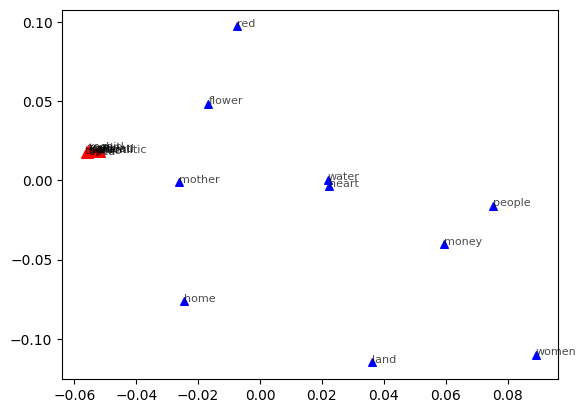

In [49]:
MAX_WORDS_TO_DISPLAY = 10

def plot_bilingual_embeddings(embeddings1, embeddings2, selected_words):
  count_words_displayed = 0
  for en_word, nah_word in selected_words:
      if en_word in embeddings1 and nah_word in embeddings2:
        count_words_displayed += 1
      else:
        continue
      word = en_word
      coord = embeddings1[word]
      plt.scatter(coord[0], coord[1], color='blue', marker='^', s=30, label='English' if count_words_displayed == 0 else None)
      plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.7)

      word = nah_word
      coord = embeddings2[word]
      plt.scatter(coord[0], coord[1], color='red', marker='^', s=30, label='Nahuatl' if count_words_displayed == 0 else None)
      plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.7)
      if count_words_displayed == MAX_WORDS_TO_DISPLAY:
        break

plot_bilingual_embeddings(ori_en_word_norm_embeddings, ori_nah_word_norm_embeddings, en_nah_test)

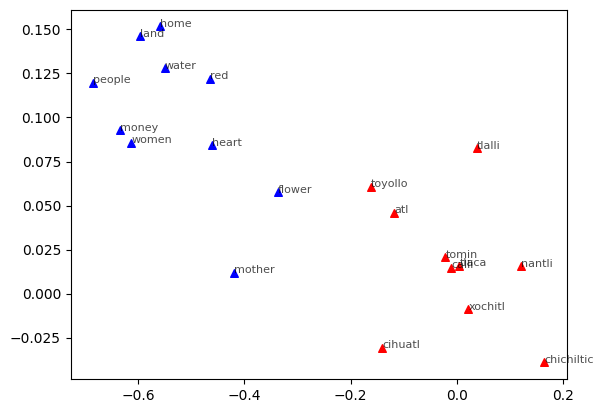

In [50]:
plot_bilingual_embeddings(unsup_en_word_embeddings, unsup_nah_word_embeddings, en_nah_test)

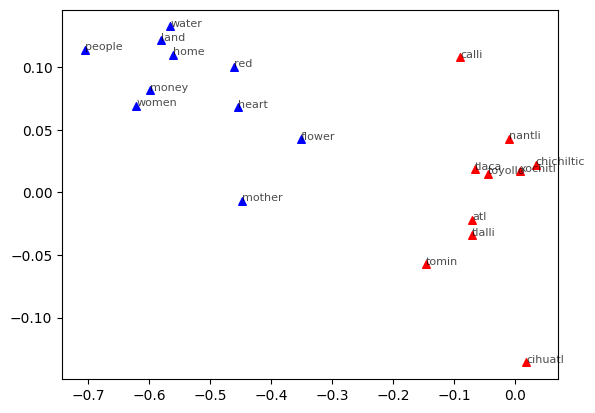

In [51]:
plot_bilingual_embeddings(semisup_num_en_word_embeddings, semisup_num_nah_word_embeddings, en_nah_test)

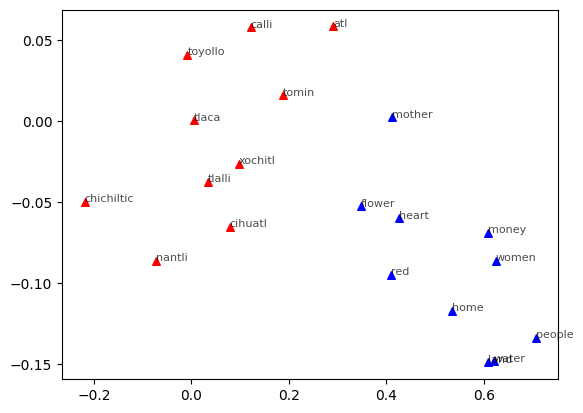

In [52]:
plot_bilingual_embeddings(semisup_words_en_word_embeddings, semisup_words_nah_word_embeddings, en_nah_test)

# Fasttext (better than Word2Vec)

## 1. Download Fasttext The Pre-Train Word Vectors for Languages (Run Once - Done. Not Used)

source: [link](https://fasttext.cc/docs/en/crawl-vectors.html)

In [ ]:
# fasttext.util.download_model('en', if_exists='ignore')  # English
# ft_en = fasttext.load_model('cc.en.300.bin')

In [ ]:
# !cp "cc.en.300.bin" "$FASTTEXT_PATH"

In [ ]:
# fasttext.util.download_model('nah', if_exists='ignore')  # Nahuatl
# ft_nah = fasttext.load_model('cc.nah.300.bin')

In [ ]:
# !cp "cc.nah.300.bin" "$FASTTEXT_PATH"

## 2. Load The Word Vectors Models & Save it In Word2Vec Format (Run Once - Done. Not Used)

reference:
- [link](https://github.com/facebookresearch/fastText)
- [link2](https://datascience.stackexchange.com/questions/20071/how-do-i-load-fasttext-pretrained-model-with-gensim)

In [53]:
from gensim.models import FastText

In [54]:
# ft_en = FastText.load(os.path.join(FASTTEXT_PATH, 'cc.en.300.bin'))
# ft_nah = fasttext.load_model(os.path.join(FASTTEXT_PATH, 'cc.nah.300.bin'))

In [55]:
from gensim.models.fasttext import load_facebook_model

# ft_en_wv = load_facebook_model(os.path.join(FASTTEXT_PATH, 'cc.en.300.bin'))
# ft_nah_wv = load_facebook_model(os.path.join(FASTTEXT_PATH, 'cc.nah.300.bin'))

In [ ]:
# ft_en_wv.wv.save_word2vec_format(PRETRAINED_FT_EN_EMB_PATH, binary=False)
# ft_nah_wv.wv.save_word2vec_format(PRETRAINED_FT_NAH_EMB_PATH, binary=False)

## 3. Train (Run Once - Done)

In [56]:
en_text = []
nah_text = []

# english corpus
with open(os.path.join(CORPUS_PATH,'en-id/News-Commentary.en-id.en')) as f:
  en_text += [sent.strip() for sent in f.readlines()] # parallel data (en-id)
with open(os.path.join(CORPUS_PATH,'en-id/wikimedia.en')) as f:
  en_text += [sent.strip() for sent in f.readlines()] # mono data (en-id)

with open(os.path.join(CORPUS_PATH,'Nahuatl_Corpus.txt')) as f:
  nah_text += [sent.strip() for sent in f.readlines()] # mono data (nah)

In [57]:
!cat "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/News-Commentary.en-id.en" "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/wikimedia.en" > "temp.en"
!cat "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/Nahuatl_Corpus.txt" > "temp.nah"

In [58]:
!wc "temp.en"
!wc "temp.nah"

  19005684  431804653 2768564552 temp.en
   5622  189983 1499899 temp.nah


In [ ]:
# Path to your corpus file
# corpus_file = "temp.en"

# model = fasttext.train_unsupervised(corpus_file,dim=100, minCount=5)
# Save the trained model
# model.save_model(os.path.join(FASTTEXT_PATH, 'scratch.en.bin'))

In [59]:
# Path to your corpus file
corpus_file = "temp.nah"

model = fasttext.train_unsupervised(corpus_file,dim=100, minCount=5)
# Save the trained model
model.save_model(os.path.join(FASTTEXT_PATH, 'scratch.nah.bin'))

In [60]:
from gensim.models.fasttext import load_facebook_model

# ft_en_wv = load_facebook_model(os.path.join(FASTTEXT_PATH, 'scratch.en.bin'))
ft_nah_wv = load_facebook_model(os.path.join(FASTTEXT_PATH, 'scratch.nah.bin'))

# ft_en_wv.wv.save_word2vec_format(FT_EN_EMB_PATH, binary=False)
ft_nah_wv.wv.save_word2vec_format(FT_NAH_EMB_PATH, binary=False)

## 4. Create the Seed Dictionary

In [61]:
from gensim.models import KeyedVectors

# Load the Word2Vec model
# word2vec_model = KeyedVectors.load_word2vec_format(embedding_file, binary=True)

# en_loaded_model = KeyedVectors.load_word2vec_format(FT_EN_EMB_PATH, binary=False)
nah_loaded_model = KeyedVectors.load_word2vec_format(FT_NAH_EMB_PATH, binary=False)

In [62]:
# Get the vocabulary list
# en_vocab = list(en_loaded_model.index_to_key)
nah_vocab = list(nah_loaded_model.index_to_key)

In [63]:
# with open(os.path.join(EMBEDDING_PATH, "vocab.en"), "w") as f:
#   for vocab in en_vocab:
#     f.write(vocab + "\n")

with open(os.path.join(EMBEDDING_PATH, "vocab.nah"), "w") as f:
  for vocab in nah_vocab:
    f.write(vocab + "\n")

### 4.1. Numeral Dictionary

In [64]:
!cat "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/News-Commentary.en-id.en" "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/en-id/wikimedia.en" > "temp.en"
!cat "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/corpus/Nahuatl_Corpus.txt" > "temp.nah"

In [65]:
NUMERAL_PATTERN = re.compile(r"^[0-9]+$")

def subset_values(list1, list2):
    return [x for x in list1 if x in list2]

numerals_en = [vocab for vocab in en_vocab if NUMERAL_PATTERN.match(vocab)]
numerals_nah = [vocab for vocab in nah_vocab if NUMERAL_PATTERN.match(vocab)]

numerals_en = sorted(numerals_en)
numerals_nah = sorted(numerals_nah)
numerals_en_nah = subset_values(numerals_en, numerals_nah)

In [66]:
with open("temp.en") as f:
  en_text = "".join(f.readlines())

with open("temp.nah") as f:
  nah_text = "".join(f.readlines())

In [67]:
indices = []
for idx, number in enumerate(numerals_en_nah):
  if number not in en_text or number not in nah_text:
    indices.append(idx)

# Remove items at the specified indices
for index in sorted(indices, reverse=True):
    del numerals_en_nah[index]

In [68]:
len(indices)

0

In [69]:
with open(EN_NAH_TRAIN_NUMERAL_DICT_PATH, "w") as f:
  for number in numerals_en_nah:
    f.write(number + " " + number + "\n")

## 5. Create the Mapping

if you encounter this problem while running:
```
ERROR: Install CuPy for CUDA support
```
maybe you forgot to use GPU

In [70]:
!python3 "vecmap/map_embeddings.py" --unsupervised "$FT_EN_EMB_PATH" "$FT_NAH_EMB_PATH" "$UNSUP_MAPPED_ENNAH_EN_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" --cuda

In [71]:
!python3 "vecmap/map_embeddings.py" --semi_supervised "$EN_NAH_TRAIN_NUMERAL_DICT_PATH" "$FT_EN_EMB_PATH" "$FT_NAH_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" --cuda

the warning is probably because of the 'value' that we set, minCount=5. these OOV occured < 5

In [72]:
!python3 "vecmap/map_embeddings.py" --semi_supervised "$EN_NAH_TRAIN_DICT_PATH" "$FT_EN_EMB_PATH" "$FT_NAH_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" --cuda

## 6. Evaluation

In [73]:
!python3 "vecmap/eval_translation.py" "$UNSUP_MAPPED_ENNAH_EN_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$UNSUP_MAPPED_ENNAH_EN_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 42.37%  Accuracy:  0.00%
Coverage: 42.37%  Accuracy:  0.00%


In [74]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 42.37%  Accuracy:  0.00%
Coverage: 42.37%  Accuracy:  0.00%


In [75]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$EN_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 42.37%  Accuracy:  0.00%
Coverage: 42.37%  Accuracy:  0.00%


## 7. Plot

In [76]:
from gensim.models import KeyedVectors

# Load the word embeddings
ori_en_word_vectors = KeyedVectors.load_word2vec_format(FT_EN_EMB_PATH, binary=False)
ori_nah_word_vectors = KeyedVectors.load_word2vec_format(FT_NAH_EMB_PATH, binary=False)

In [77]:
unsup_en_word_vectors = KeyedVectors.load_word2vec_format(UNSUP_MAPPED_ENNAH_EN_EMB_PATH, binary=False)
unsup_nah_word_vectors = KeyedVectors.load_word2vec_format(UNSUP_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [78]:
semisup_num_en_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_NUMERAL_MAPPED_ENNAH_EN_EMB_PATH, binary=False)
semisup_num_nah_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [79]:
semisup_words_en_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_WORDS_MAPPED_ENNAH_EN_EMB_PATH, binary=False)
semisup_words_nah_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [80]:
ori_en_word_embeddings = {word: ori_en_word_vectors[word] for word in ori_en_word_vectors.index_to_key}
ori_nah_word_embeddings = {word: ori_nah_word_vectors[word] for word in ori_nah_word_vectors.index_to_key}

unsup_en_word_embeddings = {word: unsup_en_word_vectors[word] for word in unsup_en_word_vectors.index_to_key}
unsup_nah_word_embeddings = {word: unsup_nah_word_vectors[word] for word in unsup_nah_word_vectors.index_to_key}

semisup_num_en_word_embeddings = {word: semisup_num_en_word_vectors[word] for word in semisup_num_en_word_vectors.index_to_key}
semisup_num_nah_word_embeddings = {word: semisup_num_nah_word_vectors[word] for word in semisup_num_nah_word_vectors.index_to_key}

semisup_words_en_word_embeddings = {word: semisup_words_en_word_vectors[word] for word in semisup_words_en_word_vectors.index_to_key}
semisup_words_nah_word_embeddings = {word: semisup_words_nah_word_vectors[word] for word in semisup_words_nah_word_vectors.index_to_key}

In [81]:
import numpy as np

def normalized_embeddings(word_embeddings):
  # Normalize the word embeddings
  word_embeddings_normalized = {}
  for word, embedding in word_embeddings.items():
      normalized_embedding = embedding / np.linalg.norm(embedding)
      word_embeddings_normalized[word] = normalized_embedding

  return word_embeddings_normalized

ori_en_word_norm_embeddings = normalized_embeddings(ori_en_word_embeddings)
ori_nah_word_norm_embeddings = normalized_embeddings(ori_nah_word_embeddings)

unsup_en_word_norm_embeddings = normalized_embeddings(unsup_en_word_embeddings)
unsup_nah_word_norm_embeddings = normalized_embeddings(unsup_nah_word_embeddings)

semisup_num_en_word_norm_embeddings = normalized_embeddings(semisup_num_en_word_embeddings)
semisup_num_nah_word_norm_embeddings = normalized_embeddings(semisup_num_nah_word_embeddings)

semisup_words_en_word_norm_embeddings = normalized_embeddings(semisup_words_en_word_embeddings)
semisup_words_nah_word_norm_embeddings = normalized_embeddings(semisup_words_nah_word_embeddings)

In [82]:
with open(EN_NAH_TEST_DICT_PATH) as f:
  en_nah_test = [line.strip().split() for line in f.readlines()]

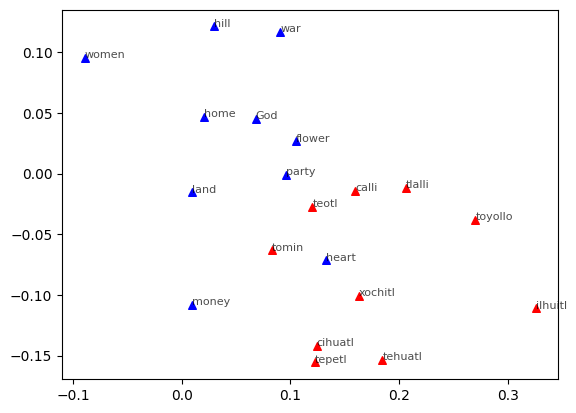

In [83]:
MAX_WORDS_TO_DISPLAY = 10

def plot_bilingual_embeddings(embeddings1, embeddings2, selected_words):
  count_words_displayed = 0
  for en_word, nah_word in selected_words:
      if en_word in embeddings1 and nah_word in embeddings2:
        count_words_displayed += 1
      else:
        continue
      word = en_word
      coord = embeddings1[word]
      plt.scatter(coord[0], coord[1], color='blue', marker='^', s=30, label='English' if count_words_displayed == 0 else None)
      plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.7)

      word = nah_word
      coord = embeddings2[word]
      plt.scatter(coord[0], coord[1], color='red', marker='^', s=30, label='Nahuatl' if count_words_displayed == 0 else None)
      plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.7)
      if count_words_displayed == MAX_WORDS_TO_DISPLAY:
        break

plot_bilingual_embeddings(ori_en_word_norm_embeddings, ori_nah_word_norm_embeddings, en_nah_test)

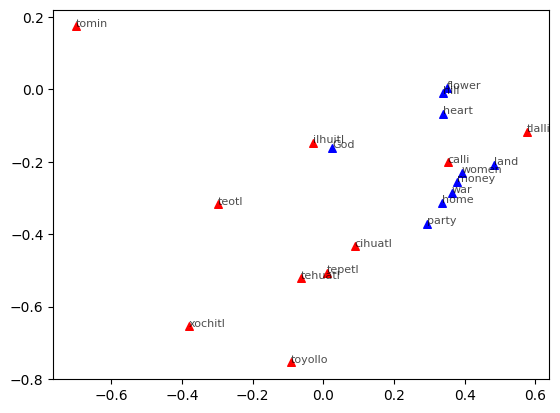

In [84]:
plot_bilingual_embeddings(unsup_en_word_embeddings, unsup_nah_word_embeddings, en_nah_test)

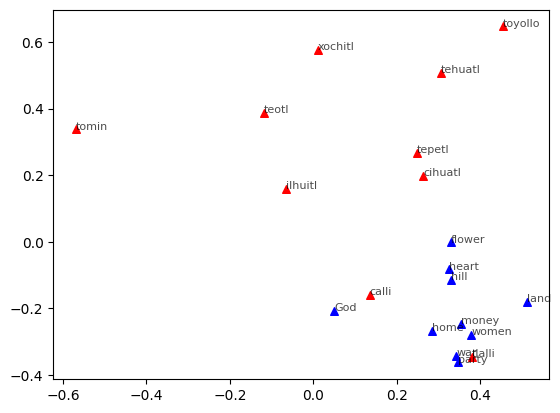

In [85]:
plot_bilingual_embeddings(semisup_num_en_word_embeddings, semisup_num_nah_word_embeddings, en_nah_test)

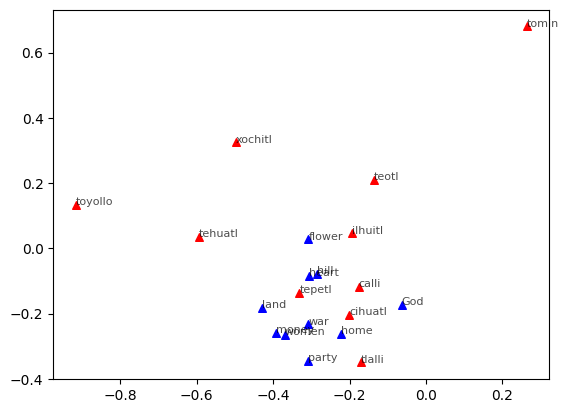

In [86]:
plot_bilingual_embeddings(semisup_words_en_word_embeddings, semisup_words_nah_word_embeddings, en_nah_test)